m
[0.55714286]
merr
[0.00298259]


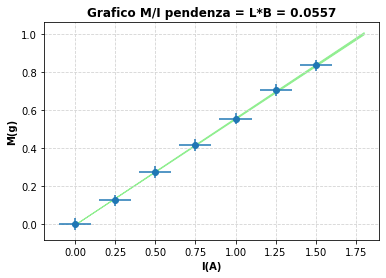

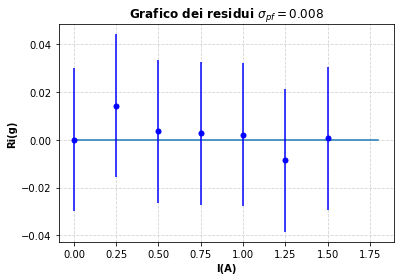

sigma_post_fit
0.007791937224739776
B
[0.00546]
Berr
[5.54061955e-05]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

fig = plt.figure()
ax = fig.gca()

#gli errori sulle masse considerati sono 0.014*2
#la sigma post fit nelle due simulazioni risulta di poco minore
#quindi è una buona stima dell'errore, forse, un po sovrastimato

F = np.array([0,0.555,0.275,0.125,0.415,0.705,0.835])
F_err = np.ones(len(F))*0.03
I = np.array([0,1,0.5,0.25,0.75,1.25,1.5])
I_err = np.ones(len(I))*0.1

plt.title("Grafico M/I pendenza = L*B = 0.0557",fontweight="bold")
plt.xlabel("I(A)",fontweight="bold")
plt.ylabel("M(g)",fontweight="bold")

plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.errorbar(I, F, xerr=I_err, yerr=F_err, fmt='o')

def func(x, A):
  return (A*x)

popt, pcov = scipy.optimize.curve_fit(func, I, F,sigma=F_err)

#fit,cov = np.polyfit(I,F, 1,w = 1/F_err,cov="True")
#merr,qerr = np.sqrt(np.diag(cov))
merr = np.sqrt(np.diag(pcov))
#m,q = fit
m = popt
deltaYtot = (F_err**2+(m*I_err)**2)**(1/2)
#fit,cov = np.polyfit(I,F, 1,w = 1/deltaYtot,cov="True")
popt, pcov = scipy.optimize.curve_fit(func, I, F,sigma=deltaYtot)
#merr,qerr = np.sqrt(np.diag(cov))
merr = np.sqrt(np.diag(pcov))
#m,q = fit
m = popt

print("m")
print(m)
print("merr")
print(merr)
#print("q")
#print(q)
#print("qerr")
#print(qerr)
q = qerr = 0


x = np.linspace(0,max(I)*1.2,1000)

y = q + m*x 

y_erroreMin = (q-qerr) + (m-merr)*x

y_erroreMax = (q+qerr) + (m+merr)*x

plt.fill_between(x,y_erroreMin,y_erroreMax, color="lightgreen",zorder=1)
#plt.plot(x,y, color="green")
plt.show()
fig.savefig(f'Grafico_Lunghezza_L',dpi = 300)


Ff = q+m*I

Ri = Ff-F

fig = plt.figure()
ax = fig.gca()
plt.title("Grafico dei residui $\sigma_{pf} = 0.008$",fontweight="bold")
plt.xlabel("I(A)",fontweight="bold")
plt.ylabel("Ri(g)",fontweight="bold")
plt.plot(np.linspace(0,max(I)*1.2,1000),np.zeros(1000))
plt.errorbar(I,Ri, yerr = F_err, markersize=5, color='blue',zorder=3, fmt='o')
plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.show()
fig.savefig(f'Residui_LunghezzaL.pdf',dpi = 300)

sigma_post_fit = (np.sum((Ff-F)**2)/(len(Ff)-2))**(1/2)
print("sigma_post_fit")
print(sigma_post_fit)
print("B")
print(m*(0.0098))
print("Berr")
print(m*0.0098*((merr/m)**2 + (0.001/(0.116))**2)**(1/2))
